In [1]:
import numpy as np
# Compatibility fix for deprecated NumPy aliases
if not hasattr(np, 'float'):
    np.float = float
if not hasattr(np, 'int'):
    np.int = int
if not hasattr(np, 'bool'):
    np.bool = bool

import numpy as np # needed for formatting data for this tutorial
import pandas as pd # needed for formatting data for this tutorial
import cellex
import scanpy as sc

/opt/conda/envs/cellex_env/lib/python3.11/site-packages/cellex/utils/mapping/mouse_ens_to_human_ens.py:3: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources


# Load data

In [2]:
adata=sc.read("shared_resources_307/healthy.h5ad")

In [3]:
adata

AnnData object with n_obs × n_vars = 195739 × 33538
    obs: 'Status', 'Site', 'Tissue', 'Enrichment', 'Location', 'donor_id', 'Sex', 'Age', 'stage', 'final_clustering'
    var: 'gene_ids-SKN8090524', 'feature_types-SKN8090524', 'gene_ids-SKN8090525', 'feature_types-SKN8090525', 'gene_ids-SKN8090526', 'feature_types-SKN8090526', 'gene_ids-SKN8090527', 'feature_types-SKN8090527', 'gene_ids-SKN8090528', 'feature_types-SKN8090528', 'gene_ids-SKN8090529', 'feature_types-SKN8090529', 'gene_ids-SKN8090530', 'feature_types-SKN8090530', 'gene_ids-SKN8090531', 'feature_types-SKN8090531', 'gene_ids-SKN8090536', 'feature_types-SKN8090536', 'gene_ids-SKN8090537', 'feature_types-SKN8090537', 'gene_ids-SKN8090538', 'feature_types-SKN8090538', 'gene_ids-SKN8090539', 'feature_types-SKN8090539', 'gene_ids-SKN8090540', 'feature_types-SKN8090540', 'gene_ids-SKN8090541', 'feature_types-SKN8090541', 'gene_ids-SKN8090542', 'feature_types-SKN8090542', 'gene_ids-SKN8090543', 'feature_types-SKN8090543', 'gene_

In [4]:
adata.obs["Status"].value_counts()

Status
Healthy    195739
Name: count, dtype: int64

In [5]:
adata.obs["final_clustering"].value_counts()

final_clustering
Differentiated_KC         31108
Th                        20617
VE2                       15511
F1                        10161
VE1                        9645
Tc                         8680
Undifferentiated_KC*       8585
Differentiated_KC*         7165
Proliferating_KC           6986
Macro_1                    5781
Treg                       5743
LC_4                       5230
moDC_1                     4957
Mono                       4912
Pericyte_1_non_inflamm     4705
moDC_2                     4362
F2                         4260
LC_2                       4205
LE2                        3851
Melanocyte                 3682
moDC_3                     3171
F3                         3035
ILC1_3                     2935
ILC1_NK                    2604
LC_3                       2542
MigDC                      2080
Inf_mono                   1773
Macro_2                    1424
LE1                        1073
NK                          739
DC2                    

In [6]:
#adata = adata[adata.obs["final_clustering"]!='nan'].copy()

In [12]:
np.max(adata.X)

np.float32(14946.0)

# Prepare input files

In [7]:
# Data format

df = pd.DataFrame(
    adata.X.T.toarray(),         # convert sparse to dense
    index=adata.var_names,    # gene names 
    columns=adata.obs_names,     # cell IDs
)


In [8]:
df.head()

index,AAACCTGAGAGTGACC-1-SKN8104894,AAACCTGAGGTCGGAT-1-SKN8104894,AAACCTGAGTCGAGTG-1-SKN8104894,AAACCTGCATACTCTT-1-SKN8104894,AAACCTGCATTCACTT-1-SKN8104894,AAACCTGGTGGACGAT-1-SKN8104894,AAACCTGGTGTGAAAT-1-SKN8104894,AAACCTGTCAAGGTAA-1-SKN8104894,AAACCTGTCATAACCG-1-SKN8104894,AAACCTGTCCAAAGTC-1-SKN8104894,...,TTTGGTTCAATAGCAA-1-4820STDY7389014,TTTGGTTCACATGTGT-1-4820STDY7389014,TTTGGTTGTACACCGC-1-4820STDY7389014,TTTGGTTGTGTCTGAT-1-4820STDY7389014,TTTGGTTGTTCCACAA-1-4820STDY7389014,TTTGGTTTCAGGCCCA-1-4820STDY7389014,TTTGGTTTCGCCTGTT-1-4820STDY7389014,TTTGTCAAGGAATCGC-1-4820STDY7389014,TTTGTCAAGGACTGGT-1-4820STDY7389014,TTTGTCACACTACAGT-1-4820STDY7389014
index,,,,,,,,,,,,,,,,,,,,,
MIR1302-2HG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
FAM138A,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
OR4F5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AL627309.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AL627309.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
#Metadata format
#metadata = pd.DataFrame({
#    "cell_type": adata.obs["final_clustering"].values
#}, index=adata.obs_names)


#metadata = metadata.reset_index().rename(columns={"index": "cell_type"})

In [10]:
metadata = pd.DataFrame({"cell_type":adata.obs["final_clustering"].values}, index=adata.obs_names) 
#metadata = metadata.reset_index().rename(columns={"final_clustering": "cell_type"})
metadata

,cell_type
index,
AAACCTGAGAGTGACC-1-SKN8104894,Proliferating_KC
AAACCTGAGGTCGGAT-1-SKN8104894,Differentiated_KC
AAACCTGAGTCGAGTG-1-SKN8104894,Differentiated_KC
AAACCTGCATACTCTT-1-SKN8104894,Undifferentiated_KC*
AAACCTGCATTCACTT-1-SKN8104894,Melanocyte
...,...
TTTGGTTTCAGGCCCA-1-4820STDY7389014,LC_2
TTTGGTTTCGCCTGTT-1-4820STDY7389014,Th
TTTGTCAAGGAATCGC-1-4820STDY7389014,Th


In [22]:
metadata.value_counts()

cell_type             
Differentiated_KC         31108
Th                        20617
VE2                       15511
F1                        10161
VE1                        9645
Tc                         8680
Undifferentiated_KC*       8585
Differentiated_KC*         7165
Proliferating_KC           6986
Macro_1                    5781
Treg                       5743
LC_4                       5230
moDC_1                     4957
Mono                       4912
Pericyte_1_non_inflamm     4705
moDC_2                     4362
F2                         4260
LC_2                       4205
LE2                        3851
Melanocyte                 3682
moDC_3                     3171
F3                         3035
ILC1_3                     2935
ILC1_NK                    2604
LC_3                       2542
MigDC                      2080
Inf_mono                   1773
Macro_2                    1424
LE1                        1073
NK                          739
DC2              

## 1.  Create ESObject and compute ESmu

In [11]:
eso = cellex.ESObject(data=df, annotation=metadata, verbose=True)

eso.compute(verbose=True)

Preprocessing - checking input ... input parsed in 0 min 0 sec
Preprocessing - running remove_non_expressed ... excluded 4202 / 33538 genes in 0 min 27 sec
Preprocessing - normalizing data ... data normalized in 1 min 0 sec
Preprocessing - running ANOVA ... excluded 6479 / 29336 genes in 8 min 4 sec
Computing DET ... 
    esw ...
    empirical p-values ...
    esw_s ...
    finished in 0 min 53 sec
Computing EP ...
    esw ...
    empirical p-values ...
    esw_s ...
    finished in 0 min 0 sec
Computing GES ...
    esw ...
    empirical p-values ...
    esw_s ...
    finished in 0 min 47 sec
Computing NSI ...
    esw ...
    empirical p-values ...
    esw_s ...
    finished in 0 min 9 sec
Computing ESmu ...
    finished in 0 min 0 sec
Computing ESsd ...
    finished in 0 min 0 sec
Computed ['det.esw', 'det.esw_null', 'det.pvals', 'det.esw_s', 'ep.esw', 'ep.esw_null', 'ep.pvals', 'ep.esw_s', 'ges.esw', 'ges.esw_null', 'ges.pvals', 'ges.esw_s', 'nsi.esw', 'nsi.esw_null', 'nsi.pvals', 'n

## 2. View Expression Specificity scores

In [25]:
eso.results["esmu"]

,DC1,DC2,Differentiated_KC,Differentiated_KC1,F1,F2,F3,ILC1_3,ILC1_NK,ILC2,...,Tc,Th,Treg,Undifferentiated_KC1,VE1,VE2,VE3,moDC_1,moDC_2,moDC_3
gene,,,,,,,,,,,,,,,,,,,,,
ENSG00000237491,0.081807,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.378363,0.059566,0.102200,...,0.013945,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
ENSG00000177757,0.000000,0.162187,0.000000,0.000000,0.000000,0.049493,0.549213,0.000000,0.000000,0.078925,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
ENSG00000225880,0.000000,0.000000,0.033961,0.000000,0.178873,0.000000,0.102080,0.000000,0.000000,0.089855,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
ENSG00000230368,0.000000,0.077549,0.099847,0.000000,0.000000,0.137138,0.000000,0.148080,0.000000,0.000000,...,0.097149,0.000000,0.0,0.135020,0.000000,0.000000,0.014945,0.000000,0.0,0.000000
ENSG00000223764,0.000000,0.000000,0.000000,0.000000,0.704312,0.236621,0.236607,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.307990,0.655089,0.181805,0.000000,0.000000,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000277196,0.000000,0.094387,0.661321,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.455367,0.000000,0.000000,0.000000,0.002964,0.0,0.074363
ENSG00000278384,0.000000,0.000000,0.000000,0.000000,0.179555,0.000000,0.052457,0.520522,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.406513,0.0,0.000000
ENSG00000276345,0.000000,0.030863,0.494479,0.311156,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.432158,0.000000,0.000000,0.000000,0.000000,0.0,0.000000


In [23]:
eso.results["esmu"] = eso.results["esmu"].rename(columns={"Differentiated_KC*": "Differentiated_KC1"})
eso.results["esmu"] = eso.results["esmu"].rename(columns={"Undifferentiated_KC*": "Undifferentiated_KC1"})

## 3. Save results

In [13]:
cellex.utils.mapping.human_symbol_to_human_ens(eso.results["esmu"], drop_unmapped=True, verbose=True)

Mapping: human gene symbols --> human ensembl gene id's ...
1.96 pct of genes are unmapped ...
Removed 449 unmapped genes ...


In [24]:
eso.results["esmu"].to_csv("shared_resources_307/CELLEX_results/healthy_celltypeschanged.esmu.csv.gz")

## 4. Plot results

In [15]:
df_esmu = eso.results["esmu"].copy()
es_max_genes = [(df_esmu.nlargest(n=5, columns=[col]).index.values) for col in df_esmu]
genes_to_plot = list(set(np.array(es_max_genes).flatten().tolist())) # set() removes duplicates

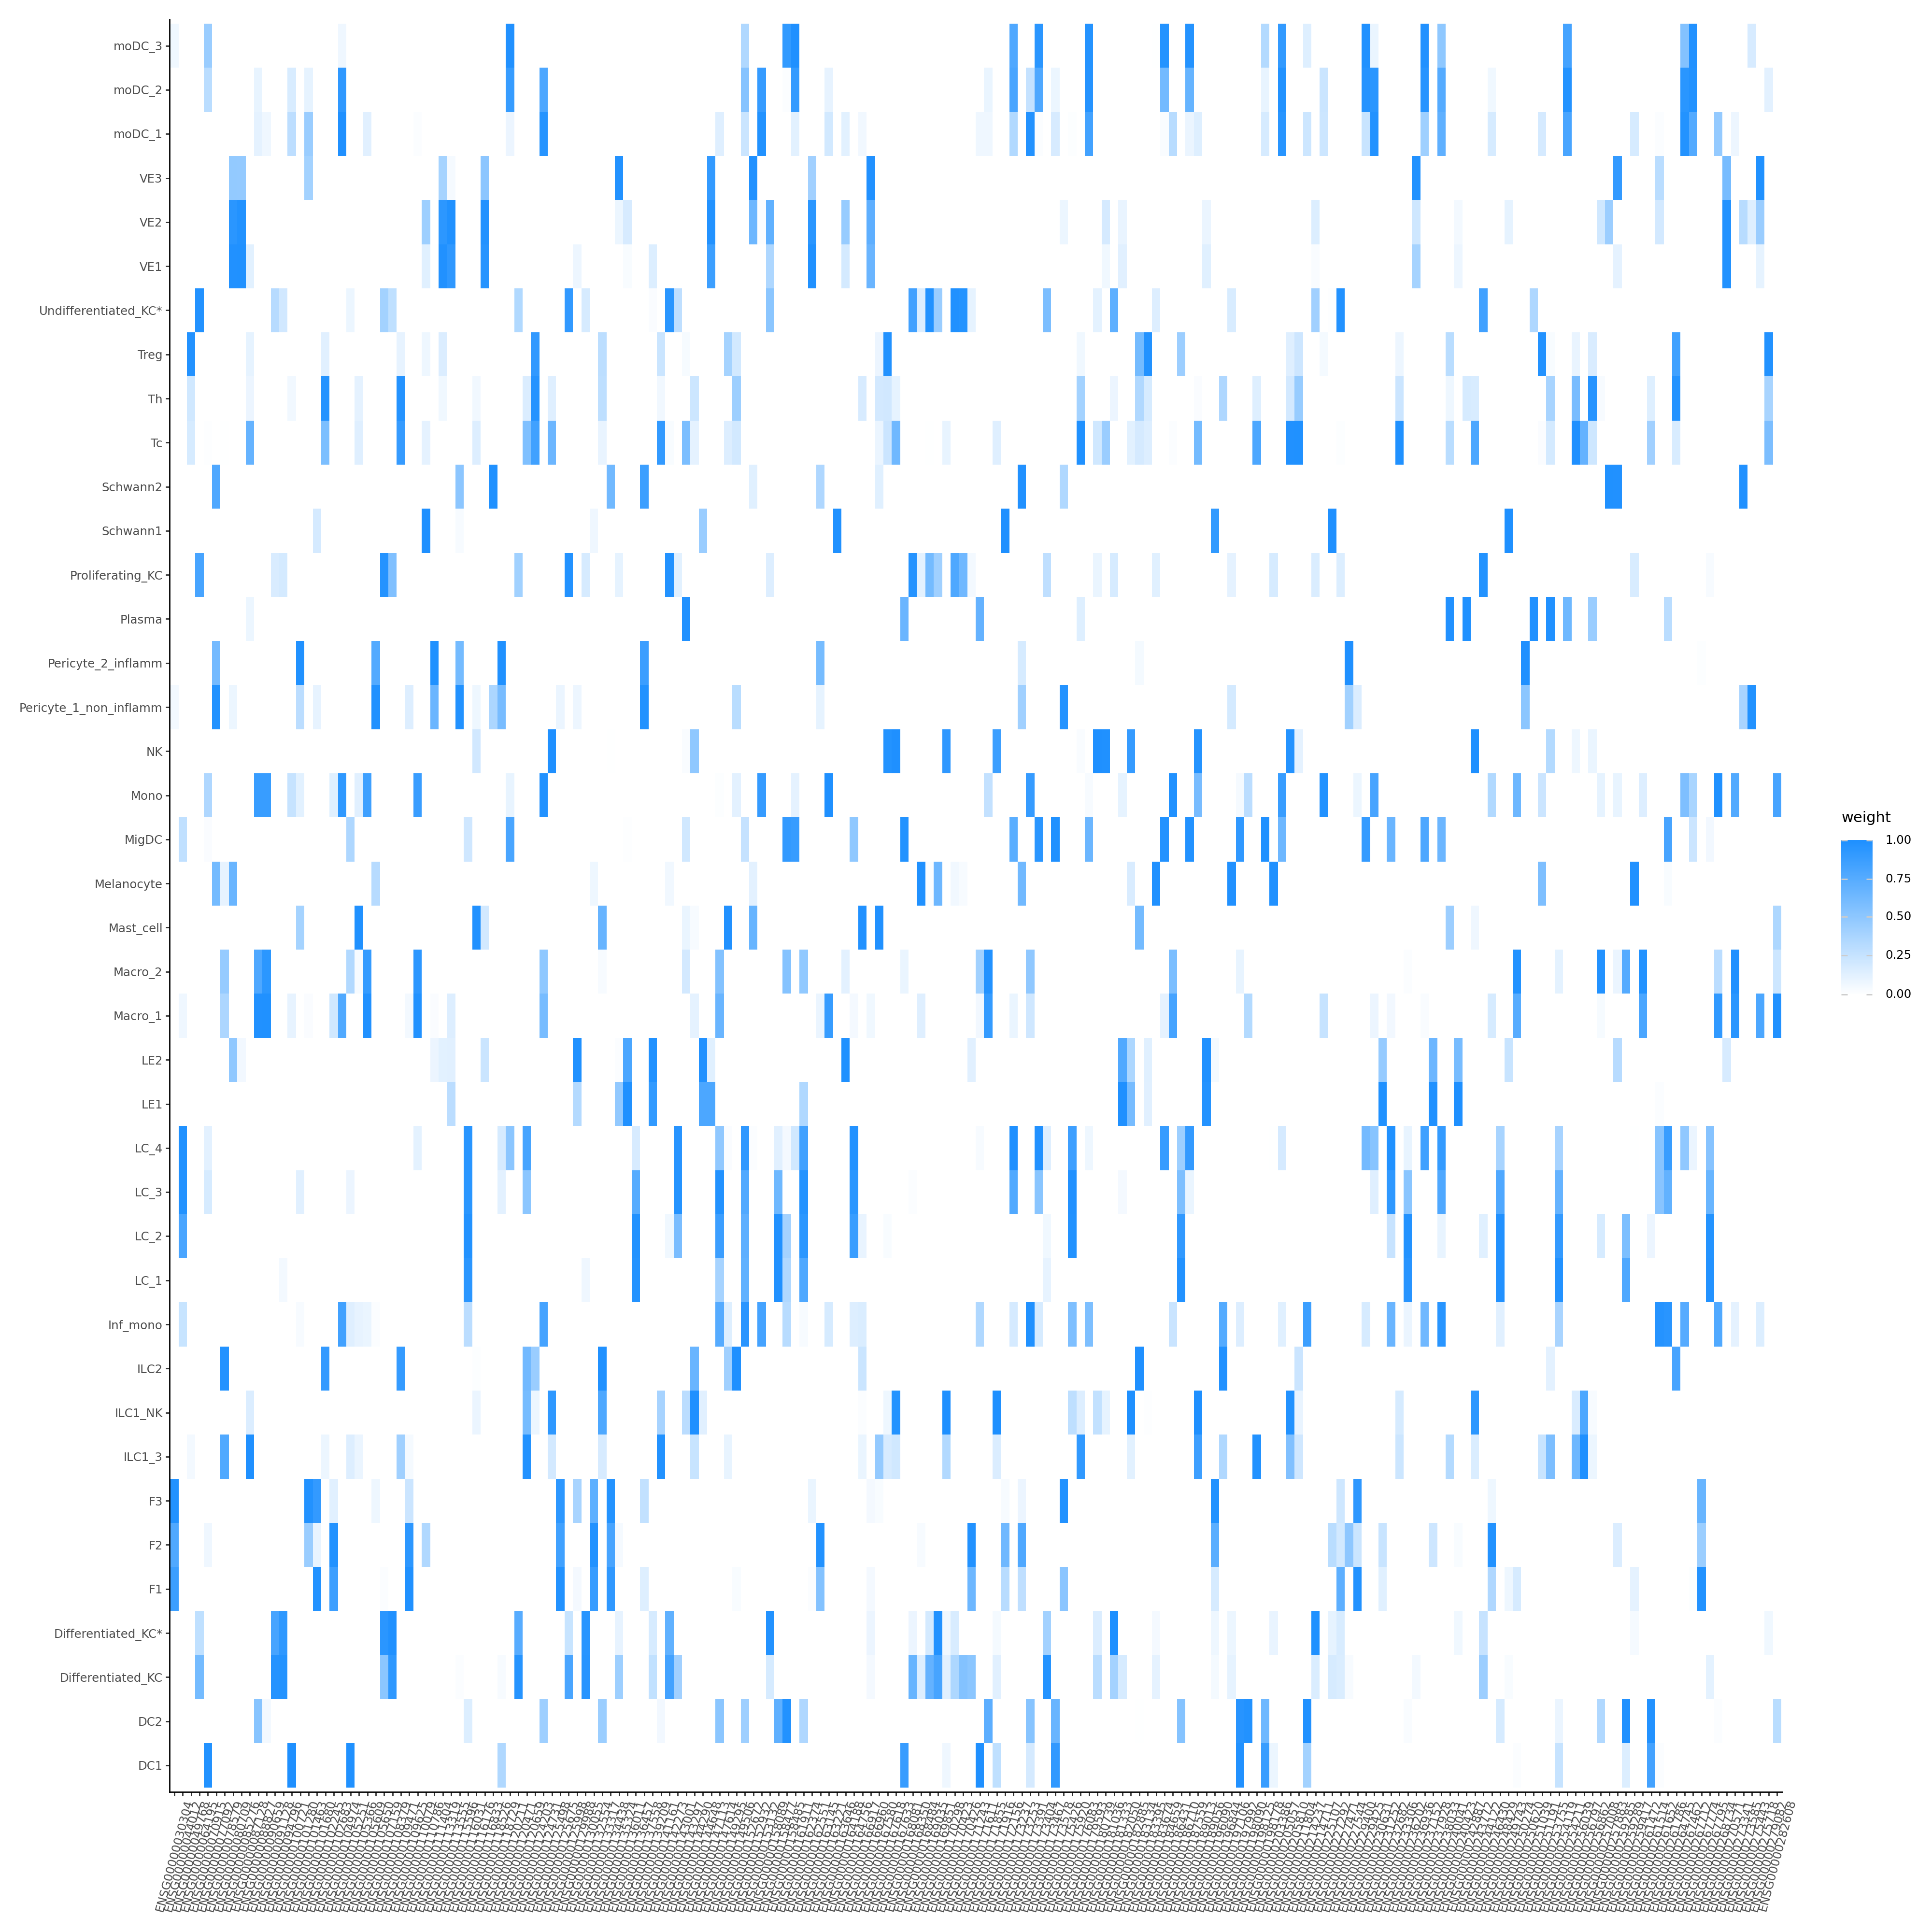

In [16]:
p_heatmap = cellex.plotting.heatmap(df_esmu, genes=genes_to_plot)
p_heatmap